Набор данных содержит опрос об удовлетворенности пассажиров авиакомпаниями. Определить какие факторы сильно влияют на удовлетворенность (или неудовлетворенность) пассажиров.
Подходит для обучения предсказания удовлетворенности пассажиров.

Пол(Gender): Пол пассажиров (Женщины, мужчины)

Тип клиента(Customer Type): Тип клиента (лояльный клиент, нелояльный клиент)

Возраст(Age): Фактический возраст пассажиров

Тип путешествия(Type of Travel): Цель полета пассажиров (Личные поездки, деловые поездки)

Класс(Class): Класс обслуживания пассажиров в самолете (Business, Eco, Eco Plus)

Дальность полета(Flight distance): Расстояние полета в рамках данного путешествия

Услуга Wi-Fi во время полета(Inflight wifi service): Уровень удовлетворенности услугой Wi-Fi во время полета (0:Неприменимо; 1-5)

Удобное время отправления/прибытия(Departure/Arrival time convenient): Уровень удовлетворенности удобным временем отправления/прибытия

Простота онлайн-бронирования(Ease of Online booking): Уровень удовлетворенности онлайн-бронированием

Местоположение выхода на посадку(Gate location): Уровень удовлетворенности местоположением выхода на посадку

Еда и напитки(Food and drink): Уровень удовлетворенности едой и напитками

Онлайн-посадка(Online boarding): Уровень удовлетворенности онлайн-посадкой

Комфорт сидений(Seat comfort): Уровень удовлетворенности комфортом сидений

Развлечения в полете(Inflight entertainment): Уровень удовлетворенности развлечениями в полете

Обслуживание на борту(On-board service): Уровень удовлетворенности обслуживанием на борту

Обслуживание в салоне(Leg room service): Уровень удовлетворенности обслуживанием в салоне

Обработка багажа(Baggage handling): Уровень удовлетворенности обработкой багажа

Регистрация на рейс(Check-in service): Уровень удовлетворенности обслуживанием на борту

Обслуживание в самолете(nflight service): Уровень удовлетворенности обслуживанием на борту

Чистота(Cleanliness): Уровень удовлетворенности чистотой

Задержка вылета в минутах(Departure Delay in Minutes): Задержка вылета на несколько минут

Задержка прибытия в минутах(Arrival Delay in Minutes): Задержка прибытия на несколько минут

Удовлетворенность(Satisfaction): Уровень удовлетворенности авиакомпанией (удовлетворенность, нейтральная или неудовлетворенность)

2025-09-22 18:49:55 - airline_analysis - INFO - Запуск анализа данных авиакомпании
INFO:airline_analysis:Запуск анализа данных авиакомпании
arrival_delay_in_minutes    310
dtype: int64
2025-09-22 18:50:20 - airline_analysis - INFO - Импортировано записей: 103904
INFO:airline_analysis:Импортировано записей: 103904
2025-09-22 18:50:20 - airline_analysis - INFO - Выполнение базового анализа...
INFO:airline_analysis:Выполнение базового анализа...
2025-09-22 18:50:21 - airline_analysis - INFO - Создание визуализаций...
INFO:airline_analysis:Создание визуализаций...


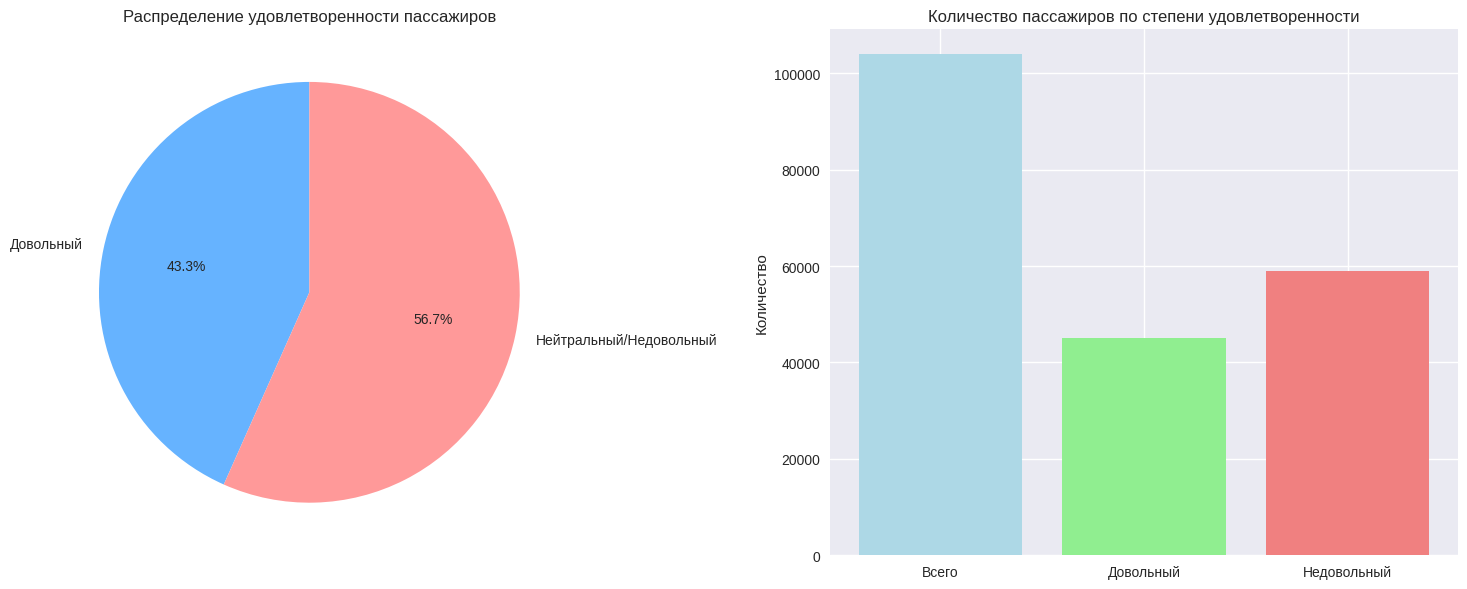

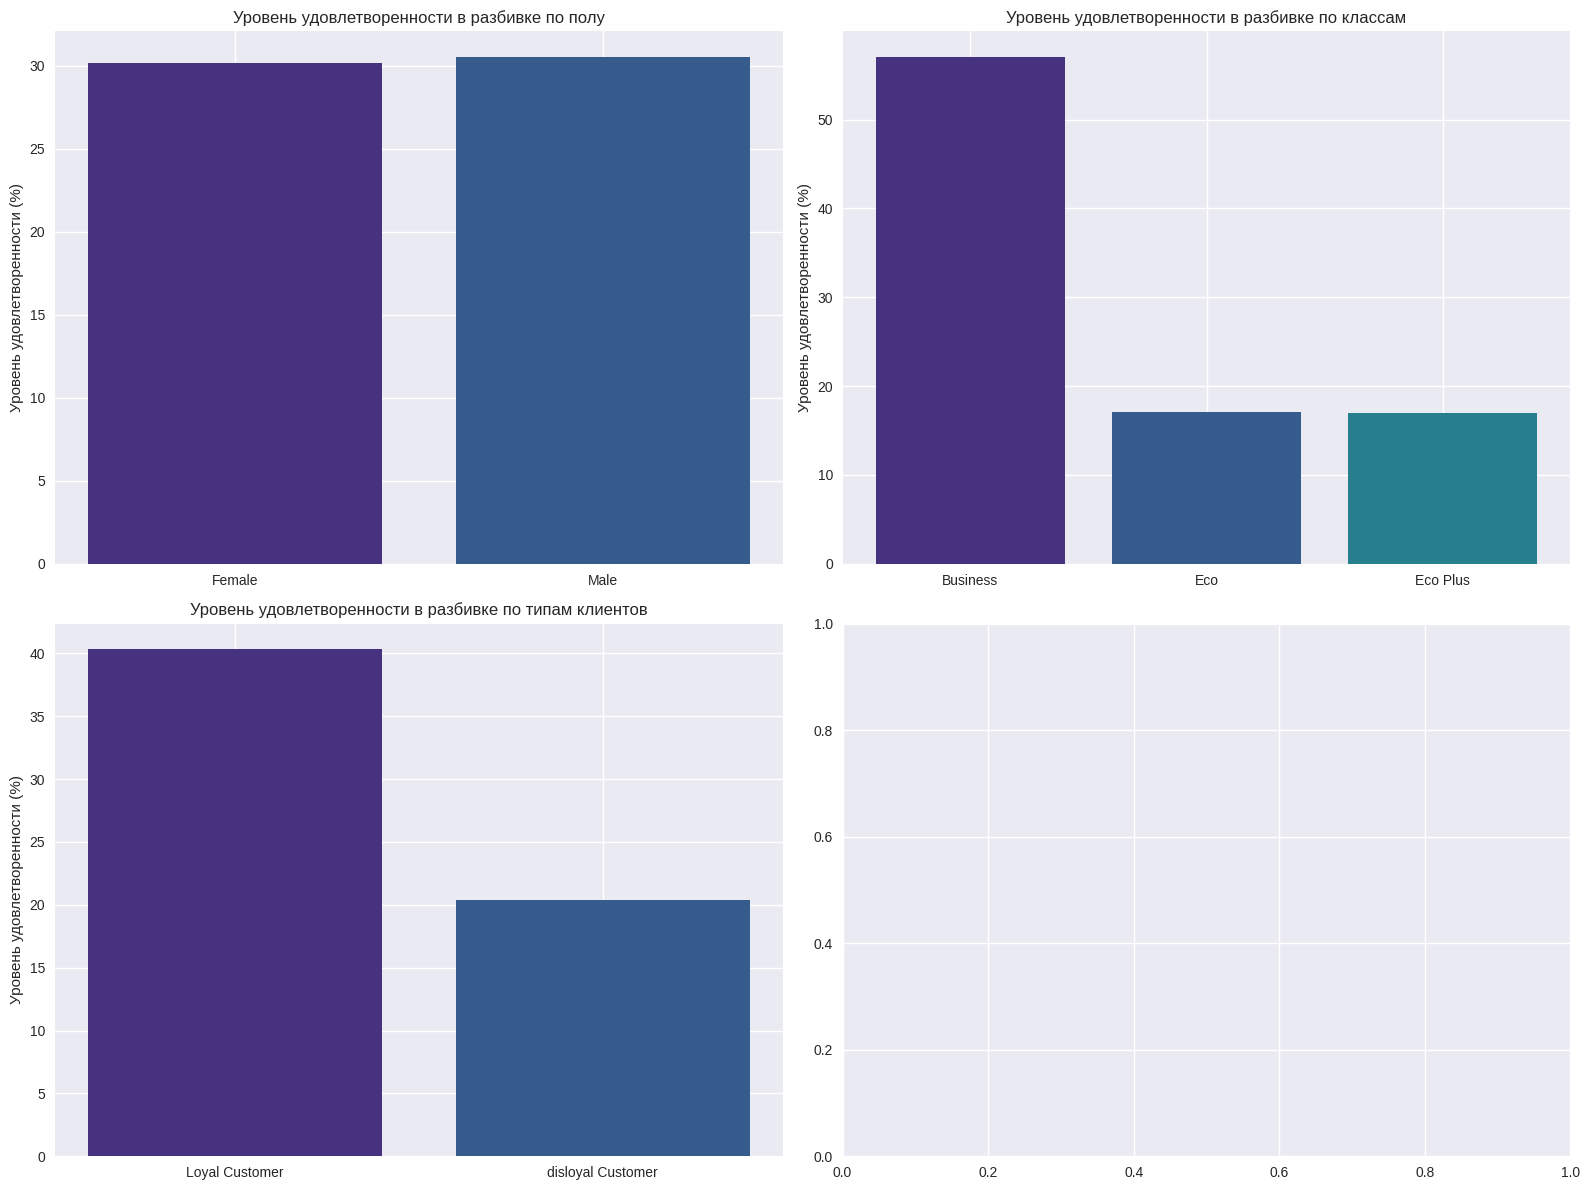

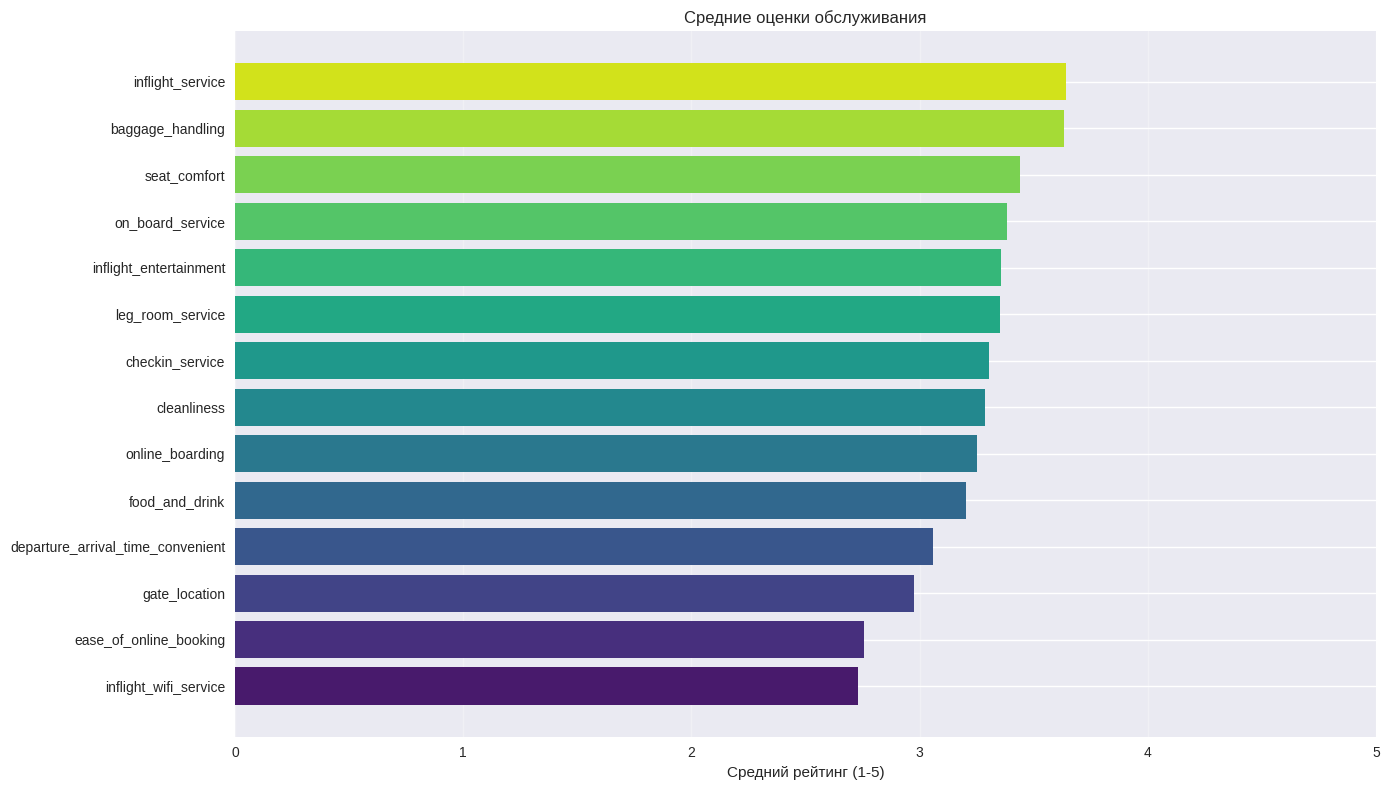

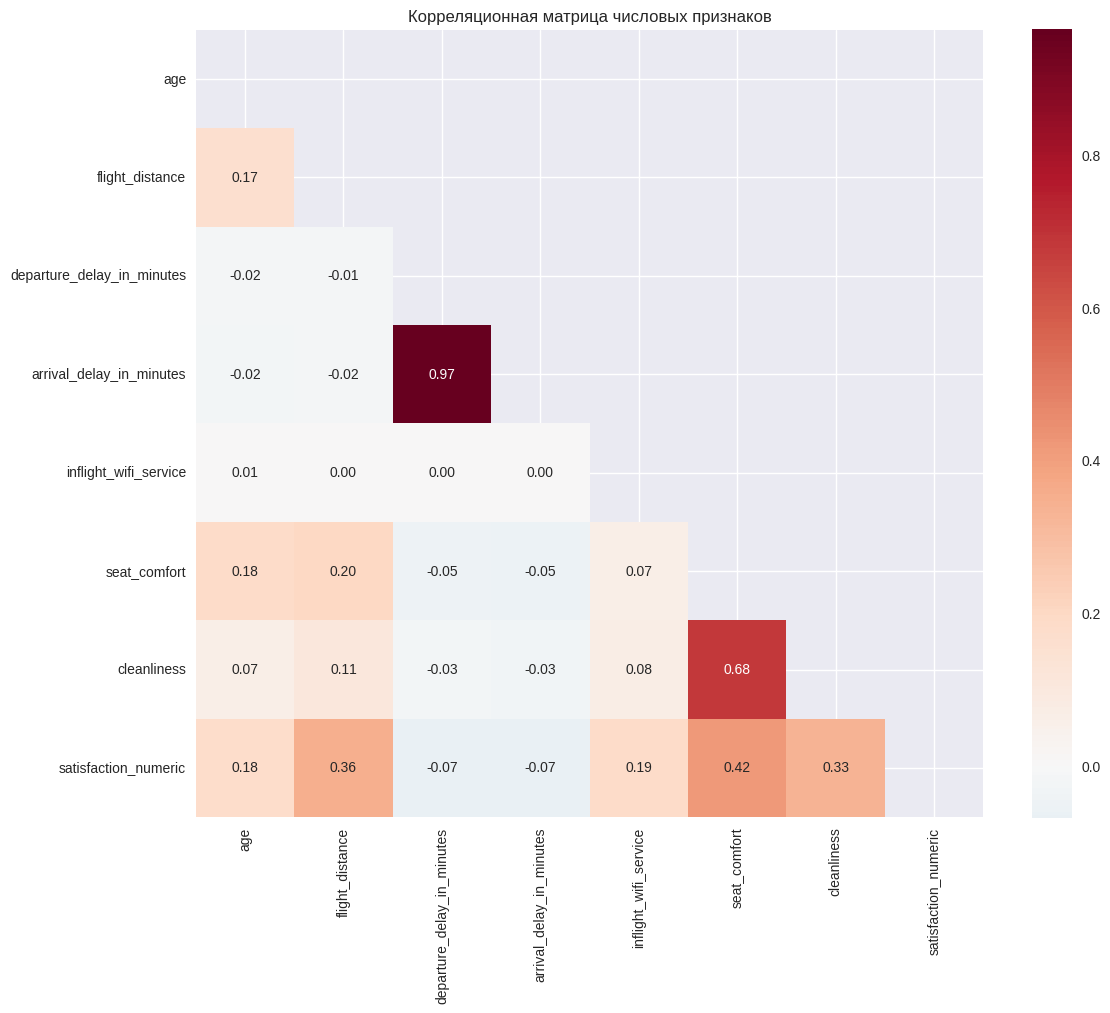

2025-09-22 18:50:22 - airline_analysis - INFO - Выполнение дополнительных аналитических запросов...
INFO:airline_analysis:Выполнение дополнительных аналитических запросов...
2025-09-22 18:50:22 - airline_analysis - INFO - Анализ по возрастным группам:
  age_group  total  satisfaction_rate  avg_distance
0  Under 18   7931           0.163914    922.715925
1     18-30  24826           0.349795   1037.830138
2     31-45  33252           0.487279   1251.634819
3     46-60  29919           0.574083   1376.496474
4   Over 60   7976           0.208375    965.703862
INFO:airline_analysis:Анализ по возрастным группам:
  age_group  total  satisfaction_rate  avg_distance
0  Under 18   7931           0.163914    922.715925
1     18-30  24826           0.349795   1037.830138
2     31-45  33252           0.487279   1251.634819
3     46-60  29919           0.574083   1376.496474
4   Over 60   7976           0.208375    965.703862
2025-09-22 18:50:23 - airline_analysis - INFO - Анализ по расстоянию пол

In [1]:
import pandas as pd
import numpy as np
from settings import  DATASET_FILENAME
from logger import setup_logger
from database_manager import DatabaseManager
from data_analyzer import DataAnalyzer
from data_visualizer import DataVisualizer

def main():
  # Настройка логирования
  logger = setup_logger('airline_analysis')
  logger.info("Запуск анализа данных авиакомпании")

  try:
    # Инициализация менеджера базы данных
    db_manager = DatabaseManager()
    db_manager.connect()

    # Создание таблицы
    db_manager.create_table()

    # Импорт данных (предполагается, что файл уже скачан)
    csv_path = DATASET_FILENAME
    record_count = db_manager.import_data_from_csv(str(csv_path))
    logger.info(f"Импортировано записей: {record_count}")

    # Инициализация анализатора
    analyzer = DataAnalyzer(db_manager)

    # Базовый анализ
    logger.info("Выполнение базового анализа...")
    basic_stats = analyzer.get_basic_statistics()

    # # Демографический анализ
    demo_analysis = analyzer.analyze_by_demographics()

    # Анализ сервисов
    service_analysis = analyzer.analyze_service_ratings()

    # # Анализ корреляций
    correlation_matrix = analyzer.correlation_analysis()

    # Анализ задержек
    delay_analysis = analyzer.delay_impact_analysis()

    # Визуализация
    logger.info("Создание визуализаций...")
    visualizer = DataVisualizer()

    # Построение графиков
    visualizer.plot_satisfaction_distribution(basic_stats)
    visualizer.plot_demographic_analysis(demo_analysis)
    visualizer.plot_service_ratings(service_analysis)
    visualizer.plot_correlation_heatmap(correlation_matrix)

    # Дополнительные запросы для анализа
    logger.info("Выполнение дополнительных аналитических запросов...")

    # Запрос 1: Влияние возраста на удовлетворенность
    age_analysis_query = '''
    SELECT
      CASE
        WHEN age < 18 THEN 'Under 18'
        WHEN age BETWEEN 18 AND 30 THEN '18-30'
        WHEN age BETWEEN 31 AND 45 THEN '31-45'
        WHEN age BETWEEN 46 AND 60 THEN '46-60'
        ELSE 'Over 60'
      END as age_group,
      COUNT(*) as total,
      AVG(CASE WHEN satisfaction = 'satisfied' THEN 1 ELSE 0 END) as
      satisfaction_rate,
      AVG(flight_distance) as avg_distance
    FROM passengers
    GROUP BY age_group
    ORDER BY MIN(age);
    '''

    age_analysis = db_manager.execute_query(age_analysis_query)
    logger.info("Анализ по возрастным группам:\n%s", age_analysis.to_string())

    # Запрос 2: Влияние расстояния полета
    distance_analysis_query = '''
    SELECT
      CASE
        WHEN flight_distance < 500 THEN 'Short (<500 km)'
        WHEN flight_distance BETWEEN 500 AND 1500 THEN 'Medium (500-1500 km)'
        WHEN flight_distance BETWEEN 1501 AND 3000 THEN 'Long (1501-3000 km)'
        ELSE 'Very Long (>3000 km)'
      END as distance_category,
      COUNT(*) as total,
      AVG(CASE WHEN satisfaction = 'satisfied' THEN 1 ELSE 0 END) as
      satisfaction_rate,
      AVG(flight_distance) as avg_distance
    FROM passengers
    GROUP BY distance_category
    ORDER BY avg_distance;
    '''

    distance_analysis = db_manager.execute_query(distance_analysis_query)
    logger.info("Анализ по расстоянию полета:\n%s", distance_analysis.to_string())

    # Вывод ключевых insights
    logger.info("\n=== КЛЮЧЕВЫЕ ИДЕИ ===")
    logger.info("1. Общий уровень удовлетворенности: %.2f%%", basic_stats['satisfaction_rate'])
    logger.info("2. Всего проанализировано пассажиров: %d", basic_stats['total_passengers'])
    logger.info("3. Средний возраст пассажиров: %.2f лет", basic_stats['avg_age'])
    logger.info("4. Среднее расстояние полета: %.2f км", basic_stats['avg_flight_distance'])

    # Поиск лучшего и худшего сервиса
    best_service = service_analysis.loc[service_analysis['avg_rating'].idxmax()]
    worst_service = service_analysis.loc[service_analysis['avg_rating'].idxmin()]

    logger.info("5. Лучший сервис: %s (оценка: %.2f)", best_service['service_name'],best_service['avg_rating'])
    logger.info("6. Худший сервис: %s (оценка: %.2f)", worst_service['service_name'],worst_service['avg_rating'])

  except Exception as e:
    logger.error("Произошла ошибка во время выполнения: %s", str(e))
    raise

  finally:
    # Закрытие соединения с базой данных
    if db_manager:
     db_manager.disconnect()

  logger.info("Анализ завершен успешно!")

if __name__ == "__main__":
  main()